In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow import keras 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import sklearn
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import tensorflow

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

(x_train, y_train), (x_val, y_val) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_val.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_val.shape == (10000,)

In [2]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = r"C:/Users/user/Desktop/vcg/output_final/train"
valid_data_dir = r"C:/Users/user/Desktop/vcg/output_final/val"
test_data_dir = r"C:/Users/user/Desktop/vcg/output_final/test"
#test_data_dir = r"/content/drive/MyDrive/outputfolder/test"
#image.open()

In [3]:

train_datagen = ImageDataGenerator(
                                     shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True,
                                   validation_split=0.4,
                                    rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size = batch_size, 
                                                      class_mode='categorical')
                       
                                       #   subset='training')# set as training data

valid_generator = train_datagen.flow_from_directory(valid_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size = batch_size, 
                                                    class_mode='categorical')
                                                    #subset='validation') #set as validation data  
                                                                                                       

Found 487 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [4]:
train_generator.class_indices

{'Center Eyes': 0, 'closed_spare': 1, 'left_movement': 2, 'right_movement': 3}

In [5]:
y_train = train_generator.classes
len(y_train)

487

In [6]:
nb_validation_samples = 60

In [7]:
dir(train_generator)
#type(train_generator.labels)
print(train_generator.classes)
#y_train = train_generator.classes
y_train = train_generator.classes
y_train.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]


(487,)

In [9]:
test_generator = train_datagen.flow_from_directory(test_data_dir,
                                                    target_size=(img_height, img_width),
                                   
                                                   batch_size = 1, 
                                                    class_mode='categorical')
                                                    #subset='validation') #set as testing data

Found 63 images belonging to 4 classes.


In [10]:
x,y = test_generator.next()
x.shape
#print(type(x))
#x

(1, 224, 224, 3)

import math
import numpy as np
import scipy
import h5py
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization  
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
def define_model_4(input_shape, outputClasses):
  
    #X_input = keras.Input(shape=(224, 224, 3))
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
   # X_2 = X
    
    # Stage 0
    #X = Conv2D(16, (3, 3), strides=(1, 1), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
   # X = BatchNormalization(axis=3, name='bn_conv1')(X)
   #X = Activation('relu')(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    X_2 = X
    #stage1:
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    #stage2:
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    #stage3:
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    
    #shortpath:
    X_2 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #avg_pooling
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    #flattening
    X = Flatten()(X)
    #fully_connected
    X = Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(10, activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs=X, name='define_model_4')
    return model
    
   
    

model = define_model_4(input_shape = (224,224,3), outputClasses =10)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','mse'])
model.summary()

import math
import numpy as np
import scipy
import h5py
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization  
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
def Gaip_model_2(input_shape, outputClasses):
  
    #X_input = keras.Input(shape=(224, 224, 3))
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
   # X_2 = X
    
    # Stage 0
    #X = Conv2D(16, (3, 3), strides=(1, 1), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
   # X = BatchNormalization(axis=3, name='bn_conv1')(X)
   #X = Activation('relu')(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    X_2 = X
    #stage1:
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    #stage2:
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    #stage3:
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    
    #shortpath:
    X_2 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #avg_pooling
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    #flattening
    X = Flatten()(X)
    #fully_connected
    #X = Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(7, activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs=X, name='define_model_4')
    return model
    
   
    

In [17]:
import math
import numpy as np
import scipy
import h5py
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization  
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
def Gaip_model_2(input_shape, outputClasses):
  
    #X_input = keras.Input(shape=(224, 224, 3))
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
   # X_2 = X
    
    # Stage 0
    #X = Conv2D(16, (3, 3), strides=(1, 1), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
   # X = BatchNormalization(axis=3, name='bn_conv1')(X)
   #X = Activation('relu')(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    X_2 = X
    #stage1:
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    #stage2:
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    #shortpath:
    X_2 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #stage3:
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((2, 2), strides=(1, 1))(X)
    X = BatchNormalization(axis=3)(X)
    
    #shortpath:
    X_2 = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((2, 2), strides=(1, 1))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #avg_pooling
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    #flattening
    X = Flatten()(X)
    #fully_connected
    X = Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(4, activation='sigmoid')(X)
    
    model = Model(inputs = X_input, outputs=X, name='Gaip_model_2')
    return model
    
   
    

In [24]:
model = Gaip_model_2(input_shape = (224,224,3), outputClasses =4)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','mse'])
model.summary()

Model: "Gaip_model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_14 (Conv2D)             (None, 230, 230, 12  3584        ['zero_padding2d_2[0][0]']       
                                8)                                                     

In [25]:
# 100 epochs for Resnet50 model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

#checkpointing
#checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
#checkpoint_path = "C:/Users/DHANVANTH/SAMSUNG/Resnet/cp-0021.ckpt.data-00000-of-00001"
checkpoint_path = "C:/Users/user/Desktop/vcg/cp-0021.ckpt.data-00000-of-00001"
checkpoint_dir = os.path.dirname(checkpoint_path)

#Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(monitor ='val_accuracy',
   filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    #save_freq=5*batch_size,
     save_best_only = True,                                                    
      mode='max')


#Reduce learning rate when a metric has stopped improving.
# Models often benefit 
#from reducing the learning rate by a factor of 2-10
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, patience=2, min_lr=0.00001)



# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model_history = model.fit(train_generator, epochs = 5,callbacks=[cp_callback, reduce_lr],
                          validation_data=valid_generator,
    validation_steps=nb_validation_samples // batch_size)
           # Pass callback to training

Epoch 1/5
16/16 [==============================] - ETA: 0s - loss: 33.5149 - accuracy: 0.2875 - mse: 0.4933 
Epoch 00001: val_accuracy improved from -inf to 0.34375, saving model to C:/Users/user/Desktop/vcg\cp-0021.ckpt.data-00000-of-00001
16/16 [==============================] - 211s 13s/step - loss: 33.5149 - accuracy: 0.2875 - mse: 0.4933 - val_loss: 23.4046 - val_accuracy: 0.3438 - val_mse: 0.6388 - lr: 0.0010
Epoch 2/5
16/16 [==============================] - ETA: 0s - loss: 2.9836 - accuracy: 0.3183 - mse: 0.4484 
Epoch 00002: val_accuracy did not improve from 0.34375
16/16 [==============================] - 206s 13s/step - loss: 2.9836 - accuracy: 0.3183 - mse: 0.4484 - val_loss: 12.8660 - val_accuracy: 0.2500 - val_mse: 0.3676 - lr: 0.0010
Epoch 3/5
16/16 [==============================] - ETA: 0s - loss: 1.3199 - accuracy: 0.3470 - mse: 0.2541 
Epoch 00003: val_accuracy did not improve from 0.34375
16/16 [==============================] - 206s 13s/step - loss: 1.3199 - accura

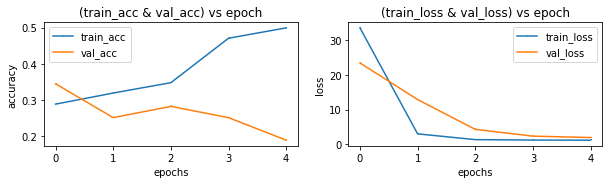

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [26]:
def plot_accuracy_loss(history):
    
    fig = plt.figure(figsize=(10,5))

    plt.subplot(221)
    #plt.plot(history.history['accuracy'],'bo--', label = "train_acc")
    plt.plot(history.history['accuracy'],marker = ',',ms = 10, label = "train_acc")
    plt.plot(history.history['val_accuracy'], marker = ',', label = "val_acc")
    plt.title("(train_acc & val_acc) vs epoch")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.subplot(222)
    plt.plot(history.history['loss'],marker= ',', label = "train_loss")
    plt.plot(history.history['val_loss'], marker=',' , label = "val_loss")
    plt.title("(train_loss & val_loss) vs epoch")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    f = plt.figure()
    plt.show()
  


plot_accuracy_loss(model_history)
f = plt.figure()
#f.savefig('C:/Users/DHANVANTH/SAMSUNG/resnet_50_epoch_vs_acc', bbox_inches='tight', dpi=600)

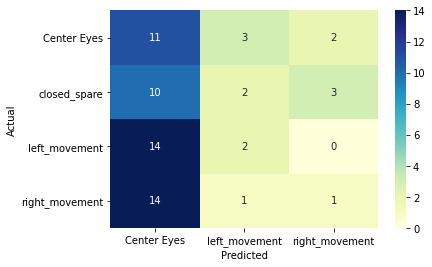

test accuracy: 20.634920634920633


In [27]:
#to plot confusion matrix for 100 epochs
import pandas as pd
import seaborn as sn
import tensorflow as tf

#model = tf.keras.models.load_model("Reflection_dataset\Saved_Model\Mobilenet_reflection.h5")
#model = model_1
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="YlGnBu", annot = True,fmt='d')
plt.show()
print('test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [50]:
import math
import numpy as np
import scipy
import h5py
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization  
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
def Gaip_model_2a(input_shape, outputClasses):
  
    #X_input = keras.Input(shape=(224, 224, 3))
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
   # X_2 = X
    
    # Stage 0
    #X = Conv2D(16, (3, 3), strides=(1, 1), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
   # X = BatchNormalization(axis=3, name='bn_conv1')(X)
   #X = Activation('relu')(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    X_2 = X
    #stage1:
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    #stage2:
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    #shortpath:
    X_2 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #stage3:
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    
    #shortpath:
    X_2 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #avg_pooling
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    #flattening
    X = Flatten()(X)
    #fully_connected
    X = Dense(1024, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(4, activation='sigmoid')(X)
    
    model = Model(inputs = X_input, outputs=X, name='Gaip_model_2a')
    return model

In [51]:
model = Gaip_model_2a(input_shape = (224,224,3), outputClasses =4)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','mse'])
model.summary()

Model: "Gaip_model_2a"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_10 (ZeroPadding  (None, 230, 230, 3)  0          ['input_11[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_66 (Conv2D)             (None, 230, 230, 32  896         ['zero_padding2d_10[0][0]']      
                                )                                                     

In [52]:
# 100 epochs for Resnet50 model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

#checkpointing
#checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
#checkpoint_path = "C:/Users/DHANVANTH/SAMSUNG/Resnet/cp-0021.ckpt.data-00000-of-00001"
checkpoint_path = "C:/Users/user/Desktop/vcg/cp-0021.ckpt.data-00000-of-00001"
checkpoint_dir = os.path.dirname(checkpoint_path)

#Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(monitor ='val_accuracy',
   filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    #save_freq=5*batch_size,
     save_best_only = True,                                                    
      mode='max')


#Reduce learning rate when a metric has stopped improving.
# Models often benefit 
#from reducing the learning rate by a factor of 2-10
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, patience=2, min_lr=0.00001)



# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model_history = model.fit(train_generator, epochs = 5,callbacks=[cp_callback, reduce_lr],
                          validation_data=valid_generator,
    validation_steps=nb_validation_samples // batch_size)
           # Pass callback to training

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 42.0394 - accuracy: 0.3162 - mse: 0.2938
Epoch 00001: val_accuracy improved from -inf to 0.25000, saving model to C:/Users/user/Desktop/vcg\cp-0021.ckpt.data-00000-of-00001
16/16 [==============================] - 126s 8s/step - loss: 42.0394 - accuracy: 0.3162 - mse: 0.2938 - val_loss: 8.6825 - val_accuracy: 0.2500 - val_mse: 0.2500 - lr: 0.0010
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 3.4774 - accuracy: 0.4168 - mse: 0.2500
Epoch 00002: val_accuracy improved from 0.25000 to 0.34375, saving model to C:/Users/user/Desktop/vcg\cp-0021.ckpt.data-00000-of-00001
16/16 [==============================] - 124s 8s/step - loss: 3.4774 - accuracy: 0.4168 - mse: 0.2500 - val_loss: 2.4975 - val_accuracy: 0.3438 - val_mse: 0.2500 - lr: 0.0010
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 2.1590 - accuracy: 0.4374 - mse: 0.2500
Epoch 00003: val_accuracy did not improve from 0.34375
16

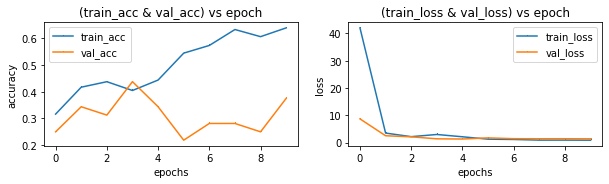

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [53]:
def plot_accuracy_loss(history):
    
    fig = plt.figure(figsize=(10,5))

    plt.subplot(221)
    #plt.plot(history.history['accuracy'],'bo--', label = "train_acc")
    plt.plot(history.history['accuracy'],marker = ',',ms = 10, label = "train_acc")
    plt.plot(history.history['val_accuracy'], marker = ',', label = "val_acc")
    plt.title("(train_acc & val_acc) vs epoch")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.subplot(222)
    plt.plot(history.history['loss'],marker= ',', label = "train_loss")
    plt.plot(history.history['val_loss'], marker=',' , label = "val_loss")
    plt.title("(train_loss & val_loss) vs epoch")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    f = plt.figure()
    plt.show()
  


plot_accuracy_loss(model_history)
f = plt.figure()
#f.savefig('C:/Users/DHANVANTH/SAMSUNG/resnet_50_epoch_vs_acc', bbox_inches='tight', dpi=600)

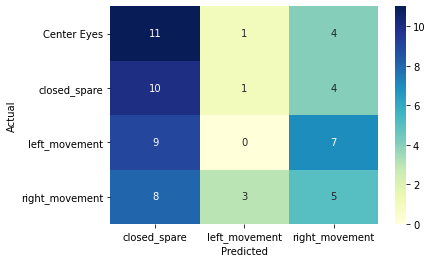

test accuracy: 30.158730158730158


In [56]:
#to plot confusion matrix for 100 epochs
import pandas as pd
import seaborn as sn
import tensorflow as tf

#model = tf.keras.models.load_model("Reflection_dataset\Saved_Model\Mobilenet_reflection.h5")
#model = model_1
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="YlGnBu", annot = True,fmt='d')
plt.show()
print('test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [20]:
import math
import numpy as np
import scipy
import h5py
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization  
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
def Gaip_model_2b(input_shape, outputClasses):
  
    #X_input = keras.Input(shape=(224, 224, 3))
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
   # X_2 = X
    
    # Stage 0
    #X = Conv2D(16, (3, 3), strides=(1, 1), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
   # X = BatchNormalization(axis=3, name='bn_conv1')(X)
   #X = Activation('relu')(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    X_2 = X
    #stage1:
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    #stage2:
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    #shortpath:
    X_2 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #stage3:
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    
    #shortpath:
    X_2 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    X = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)    
    X = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    #avg_pooling
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    #flattening
    X = Flatten()(X)
    #fully_connected
    X = Dense(1024, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(4, activation='sigmoid')(X)
    
    model = Model(inputs = X_input, outputs=X, name='Gaip_model_2b')
    return model

In [22]:
model = Gaip_model_2b(input_shape = (224,224,3), outputClasses =4)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','mse'])
model.summary()

Model: "Gaip_model_2b"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_5 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_6[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_59 (Conv2D)             (None, 230, 230, 32  896         ['zero_padding2d_5[0][0]']       
                                )                                                     

In [ ]:
# 100 epochs for Resnet50 model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

#checkpointing
#checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
#checkpoint_path = "C:/Users/DHANVANTH/SAMSUNG/Resnet/cp-0021.ckpt.data-00000-of-00001"
checkpoint_path = "C:/Users/user/Desktop/vcg/cp-0021.ckpt.data-00000-of-00001"
checkpoint_dir = os.path.dirname(checkpoint_path)

#Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(monitor ='val_accuracy',
   filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    #save_freq=5*batch_size,
     save_best_only = True,                                                    
      mode='max')


#Reduce learning rate when a metric has stopped improving.
# Models often benefit 
#from reducing the learning rate by a factor of 2-10
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, patience=2, min_lr=0.00001)



# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model_history = model.fit(train_generator, epochs = 5,callbacks=[cp_callback, reduce_lr],
                          validation_data=valid_generator,
    validation_steps=nb_validation_samples // batch_size)
           # Pass callback to training

Epoch 1/5
11/16 [===================>..........] - ETA: 12:26 - loss: 318.8952 - accuracy: 0.2477 - mse: 0.4796